## EDA - Exploratory Data Analysis on Nomis Solutions Datasets to better understand the given business challenge

In [6]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("dark", {'axes.grid' : False})
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [7]:
part1 = pd.read_csv('Nomis Solutions_Data Part I.csv')
print(part1.shape)
part1.head() # The number of rows or observations, and columns or features in dataset

(208088, 12)


,Tier,FICO,Approve Date,Term,Amount,Previous Rate,Car Type,Competition rate,Outcome,Rate,Cost of Funds,Partner Bin
0,3.0,695.0,7/1/02,72.0,35000.0,,N,6.25,0.0,7.49,1.8388,1.0
1,1.0,751.0,7/1/02,60.0,40000.0,,N,5.65,0.0,5.49,1.8388,3.0
2,1.0,731.0,7/1/02,60.0,18064.0,,N,5.65,0.0,5.49,1.8388,3.0
3,4.0,652.0,7/1/02,72.0,15415.0,,N,6.25,0.0,8.99,1.8388,3.0
4,1.0,730.0,7/1/02,48.0,32000.0,,N,5.65,0.0,5.49,1.8388,1.0


In [8]:
part2 = pd.read_csv('Nomis Solutions Part II.csv', header=1, usecols=list(range(12)))
print(part2.shape)
part2.head() ## The number of rows or observations, and columns or features in dataset

(1540, 12)


,Tier,FICO,Approve Date,Term,Amount,Previous Rate,Car Type,Competition Rate,Outcome,Rate,Cost of Funds,Partner Bin
0,2,702,7/2/02,60,22000,,U,5.85,0,6.19,1.84,3
1,2,710,7/3/02,60,21000,,U,5.85,0,6.19,1.84,1
2,3,693,7/6/02,60,19598,,U,5.85,1,7.29,1.84,1
3,3,696,7/6/02,60,23071,,U,5.85,0,7.29,1.84,3
4,3,697,7/8/02,60,21578,,U,5.80,1,7.29,1.84,2


In [9]:
part1.columns = [x.lower().replace('  ', ' ' ).replace(' ', '_' ) for x in part1.columns]

In [10]:
part1[(part1.approve_date == '7/2/02') & (part1.fico == 702)]

,tier,fico,approve_date,term,amount,previous_rate,car_type,competition_rate,outcome,rate,cost_of_funds,partner_bin
199,2.0,702.0,7/2/02,72.0,38500.0,,N,6.25,0.0,6.99,1.8388,2.0
358,2.0,702.0,7/2/02,60.0,22000.0,,U,5.85,0.0,6.19,1.8388,3.0


In [11]:
part1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208088 entries, 0 to 208087
Data columns (total 12 columns):
tier                208085 non-null float64
fico                208087 non-null float64
approve_date        208085 non-null object
term                208085 non-null float64
amount              208085 non-null float64
previous_rate       208077 non-null object
car_type            208085 non-null object
competition_rate    208085 non-null float64
outcome             208085 non-null float64
rate                208085 non-null float64
cost_of_funds       208085 non-null float64
partner_bin         208085 non-null float64
dtypes: float64(9), object(3)
memory usage: 19.1+ MB


In [12]:
part1 = part1.dropna() # Removing all blank fields from dataset
part1.shape

(208077, 12)

In [13]:
part1['previous_rate'] = pd.to_numeric(part1['previous_rate'], errors='coerce')
part1.previous_rate = part1.previous_rate.fillna(0)
part1.head()

,tier,fico,approve_date,term,amount,previous_rate,car_type,competition_rate,outcome,rate,cost_of_funds,partner_bin
0,3.0,695.0,7/1/02,72.0,35000.0,0.0,N,6.25,0.0,7.49,1.8388,1.0
1,1.0,751.0,7/1/02,60.0,40000.0,0.0,N,5.65,0.0,5.49,1.8388,3.0
2,1.0,731.0,7/1/02,60.0,18064.0,0.0,N,5.65,0.0,5.49,1.8388,3.0
3,4.0,652.0,7/1/02,72.0,15415.0,0.0,N,6.25,0.0,8.99,1.8388,3.0
4,1.0,730.0,7/1/02,48.0,32000.0,0.0,N,5.65,0.0,5.49,1.8388,1.0


## Outcome Analysis: Binary categorization of loans accepted and declined

In [14]:
part1.outcome.value_counts()

0.0    162292
1.0     45785
Name: outcome, dtype: int64

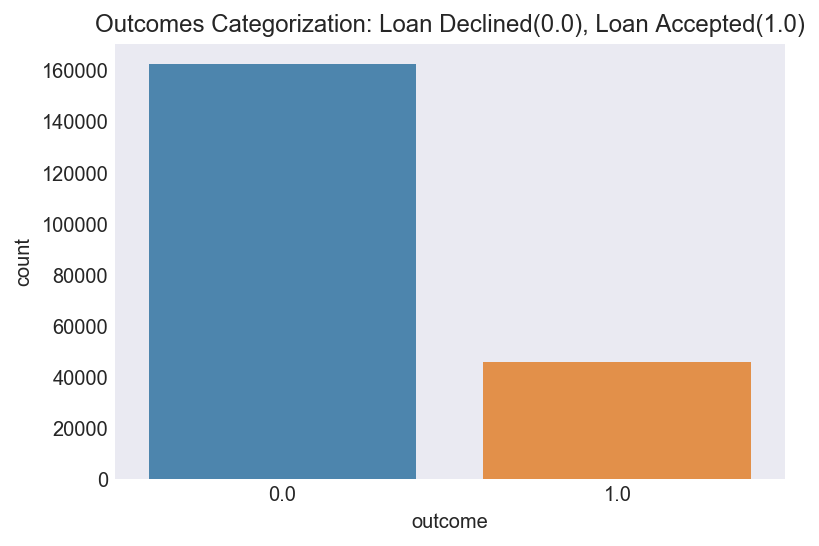

In [18]:
sns.countplot(x="outcome", 
              data=part1, 
              alpha=0.85).set_title('Outcomes Categorization: Loan Declined(0.0), Loan Accepted(1.0)');

## Tier Analysis: Organizing outcomes into tiers for further understanding

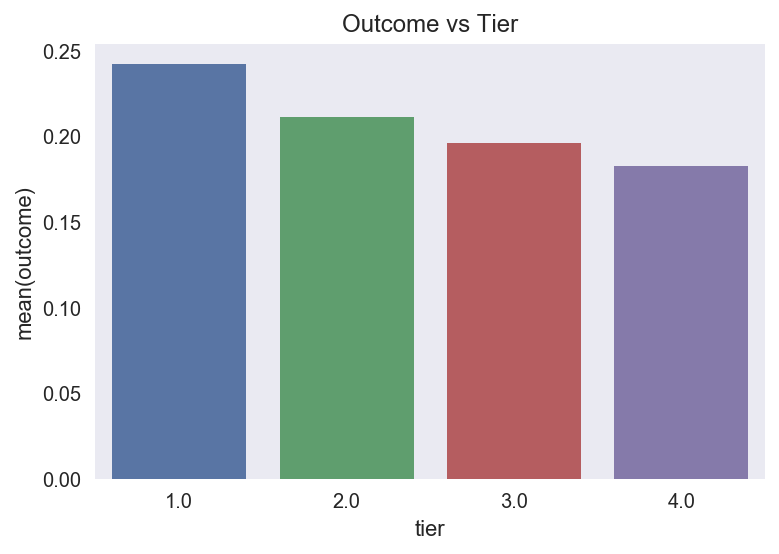

In [13]:
sns.barplot(x="tier", 
            y="outcome", 
            data=part1, 
            ci = None).set_title('Outcome vs Tier');

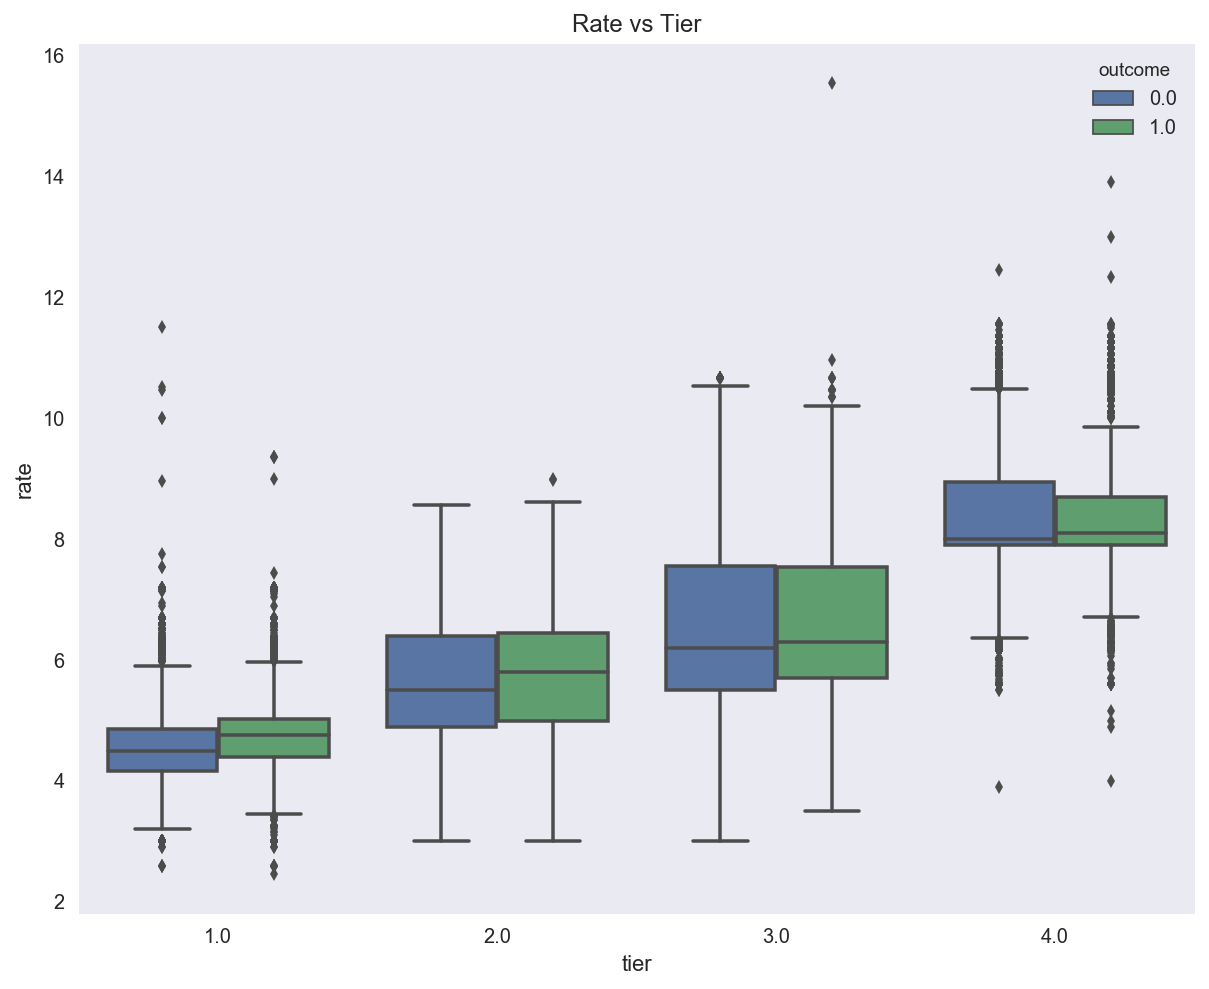

In [14]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x="tier", y="rate", data=part1, hue="outcome").set_title('Rate vs Tier');

## Profit Oppurtunity Calculation: Based on Tiers

In [45]:
part1[(part1.outcome == 1) & part1.tier == 1].sort_values(by='rate').head()

,tier,fico,approve_date,term,amount,previous_rate,car_type,competition_rate,outcome,rate,cost_of_funds,partner_bin,day,month,year
147620,1.0,782.0,2004-03-09,36.0,12000.00,0.0,N,3.65,1.0,2.45,1.09,3.0,1,3,2004
189416,1.0,828.0,2004-08-30,36.0,23678.89,0.0,N,3.75,1.0,2.59,1.65,3.0,0,8,2004
189070,1.0,800.0,2004-08-30,36.0,15000.00,0.0,N,3.75,1.0,2.59,1.65,3.0,0,8,2004
188966,1.0,766.0,2004-08-28,36.0,35986.59,0.0,N,2.99,1.0,2.59,1.65,3.0,5,8,2004
189424,1.0,802.0,2004-08-30,36.0,15000.00,0.0,N,3.75,1.0,2.59,1.65,3.0,0,8,2004


In [61]:
part1[(part1.outcome == 1) & part1.tier == 1].rate.max()

15.529999999999999

In [62]:
part1[(part1.outcome == 1) & part1.tier == 1].rate.min()

2.4500000000000002

In [47]:
part1.tier.value_counts()

1.0    100259
2.0     45469
3.0     39567
4.0     22782
Name: tier, dtype: int64

In [48]:
part1[part1.outcome == 1].tier.value_counts()

1.0    24259
2.0     9607
3.0     7759
4.0     4160
Name: tier, dtype: int64

In [49]:
# number of tier 1 customers who accept loan
100259 - 24259

76000

In [50]:
# percentage of tier 1 customers who accept loan
24259 / 100259

0.24196331501411344

In [55]:
# total of rates
sum(part1[(part1.outcome == 1) & part1.tier == 1].rate)

256074.23000003173

In [58]:
# mean rate of tier 1 customers who accept
tier1_mean_accept = np.mean(part1[(part1.outcome == 1) & part1.tier == 1].rate)
tier1_mean_accept

5.5929721524516767

In [59]:
# multiple mean of those accept times total of tier 1 customers to get a projection
100259 * tier1_mean_accept

560745.79503265268

In [72]:
part1[(part1.outcome == 0) & (part1.tier == 1) & (part1.rate > tier1_mean_accept)].shape

(2487, 15)

In [73]:
part1[(part1.tier == 1) & (part1.rate < tier1_mean_accept)].shape

(96253, 15)

In [67]:
2487 * tier1_mean_accept

13909.72174314732

In [71]:
(13909.72174314732 / 256074.23000003173) * 100

5.4319100141961165

In [69]:
100259 * 2.45

245634.55000000002

In [74]:
tier1_mean_general = np.mean(part1[part1.tier == 1].rate)

In [76]:
part1[(part1.tier == 1) & (part1.rate < tier1_mean_general)].shape

(53875, 15)

In [77]:
53875 * tier1_mean_general

247666.24288093837

## FICO Analysis

A FICO score is a type of credit score created by the Fair Isaac Corporation. Lenders use borrowers' FICO scores along with other details on borrowers' credit reports to assess credit risk and determine whether to extend credit. FICO scores take into account various factors in five areas to determine credit worthiness: payment history, current level of indebtedness, types of credit used, length of credit history and new credit accounts.

Read more: FICO Score https://www.investopedia.com/terms/f/ficoscore.asp#ixzz50f1v00di 


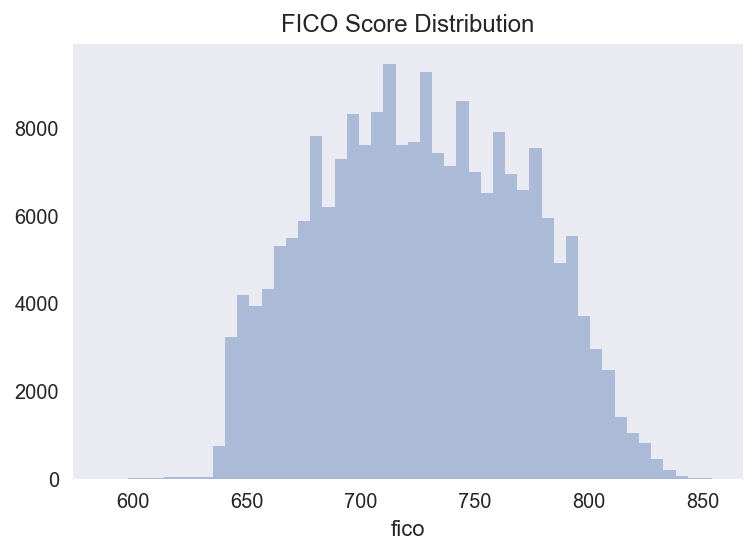

In [15]:
sns.distplot(part1.fico, kde=False).set_title('FICO Score Distribution');

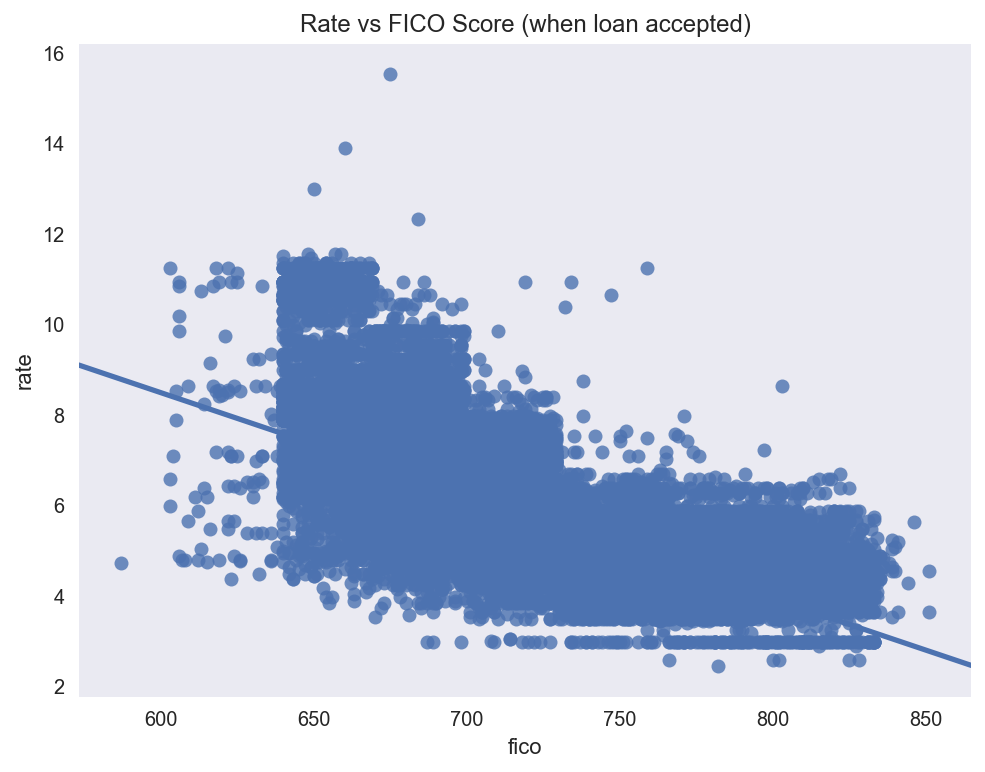

In [16]:
plt.subplots(figsize=(8, 6))
sns.regplot(x="fico", y="rate", data=part1[part1.outcome == 1]).set_title('Rate vs FICO Score (when loan accepted)');

## Approval Date Analytics

In [19]:
part1['approve_date'] = pd.to_datetime(part1['approve_date'], infer_datetime_format=True)
part1.head()

,tier,fico,approve_date,term,amount,previous_rate,car_type,competition_rate,outcome,rate,cost_of_funds,partner_bin
0,3.0,695.0,2002-07-01,72.0,35000.0,0.0,N,6.25,0.0,7.49,1.8388,1.0
1,1.0,751.0,2002-07-01,60.0,40000.0,0.0,N,5.65,0.0,5.49,1.8388,3.0
2,1.0,731.0,2002-07-01,60.0,18064.0,0.0,N,5.65,0.0,5.49,1.8388,3.0
3,4.0,652.0,2002-07-01,72.0,15415.0,0.0,N,6.25,0.0,8.99,1.8388,3.0
4,1.0,730.0,2002-07-01,48.0,32000.0,0.0,N,5.65,0.0,5.49,1.8388,1.0


In [18]:
# new column for day: 0 = Monday, 6 = Sunday 
part1['day'] = part1['approve_date'].apply(lambda row: row.weekday())

# new column for months: 1-12
part1['month'] = part1['approve_date'].apply(lambda row: row.month)

# new column for years: 2002-2004
part1['year'] = part1['approve_date'].apply(lambda row: row.year)

In [20]:
part1.day.value_counts()

0    39366
1    36385
2    33253
3    31248
4    29401
5    20137
6    18287
Name: day, dtype: int64

In [21]:
part1.month.value_counts()

7     24814
8     22985
9     21947
10    20218
6     18226
3     15960
4     14904
11    14592
2     14587
5     14323
1     13808
12    11713
Name: month, dtype: int64

In [22]:
part1.year.value_counts()

2003    103658
2004     76706
2002     27713
Name: year, dtype: int64

In [23]:
part1[part1.outcome == 1].year.value_counts()

2003    20849
2004    20183
2002     4753
Name: year, dtype: int64

In [24]:
20849/103658

0.2011325705686006

In [25]:
20183/76706

0.2631215289547102

In [26]:
4753/27713

0.17150795655468554

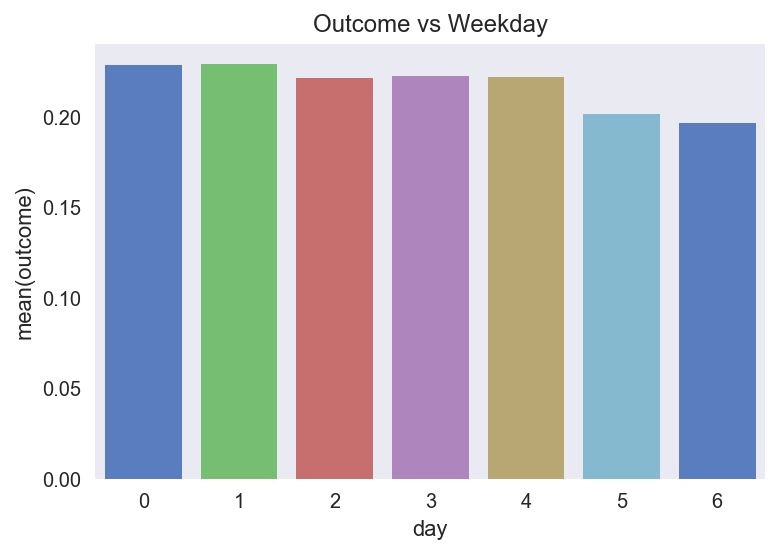

In [27]:
# reminder: Monday is 0, Sunday is 6
sns.barplot(x="day", 
            y="outcome", 
            data=part1, 
            palette='muted', 
            ci = None).set_title('Outcome vs Weekday');

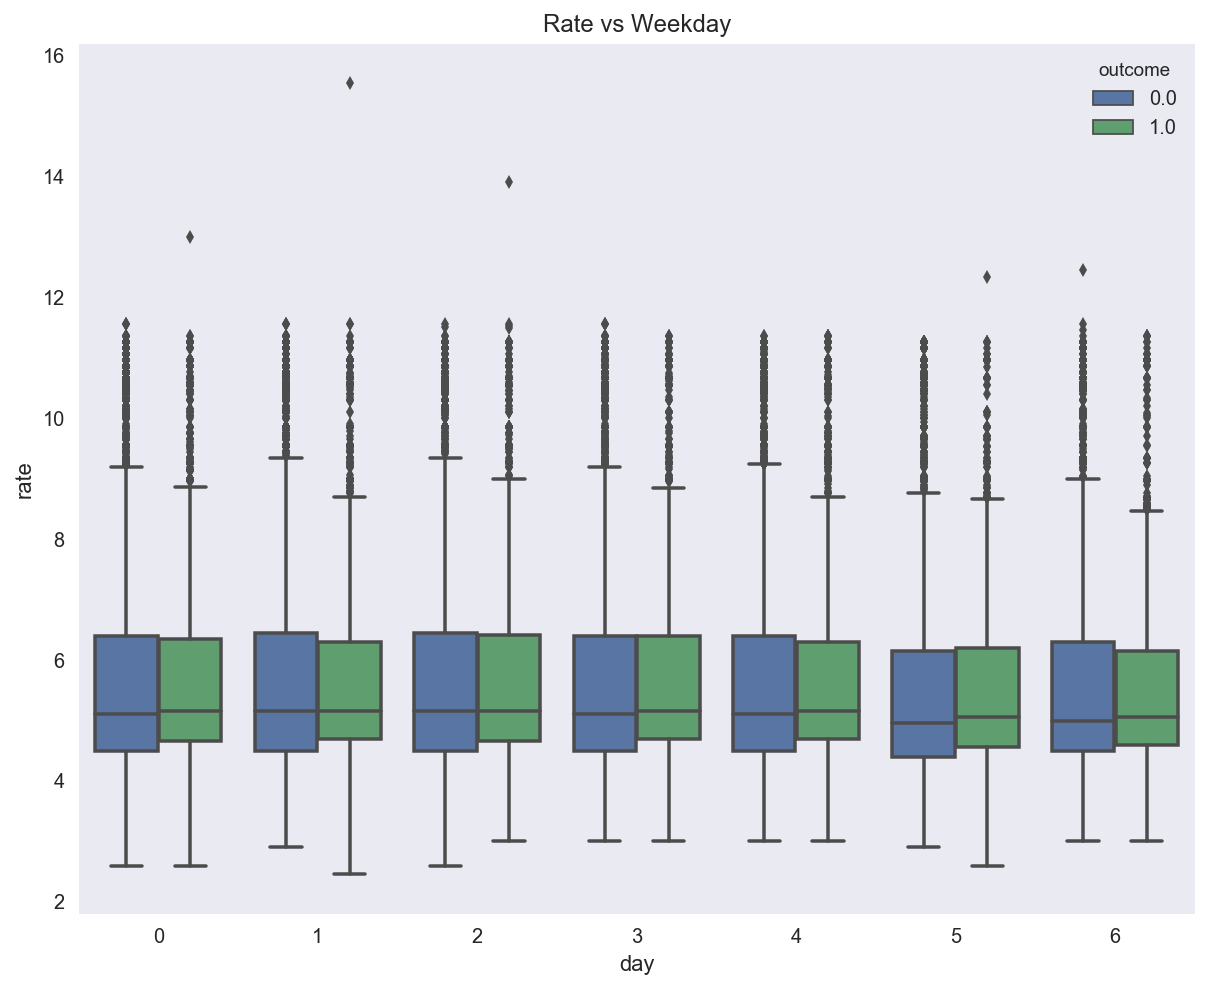

In [28]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x="day", y="rate", data=part1, hue="outcome").set_title('Rate vs Weekday');

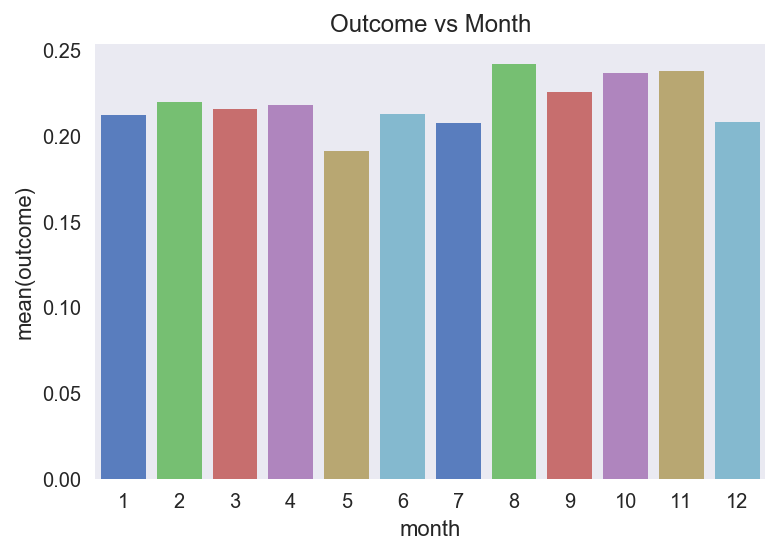

In [29]:
sns.barplot(x="month", 
            y="outcome", 
            data=part1, 
            palette='muted', 
            ci = None).set_title('Outcome vs Month');

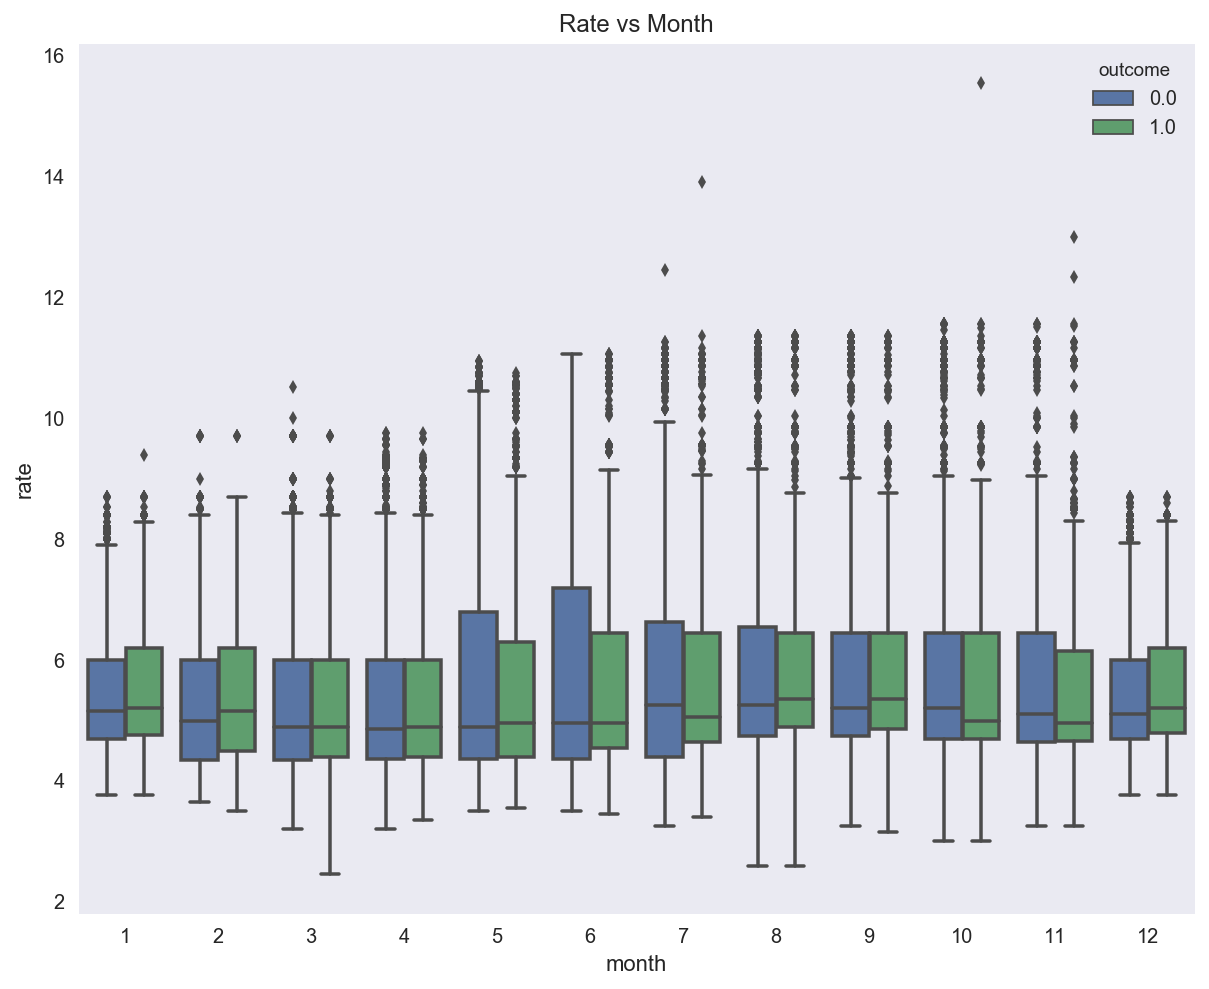

In [30]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x="month", y="rate", data=part1, hue="outcome").set_title('Rate vs Month');

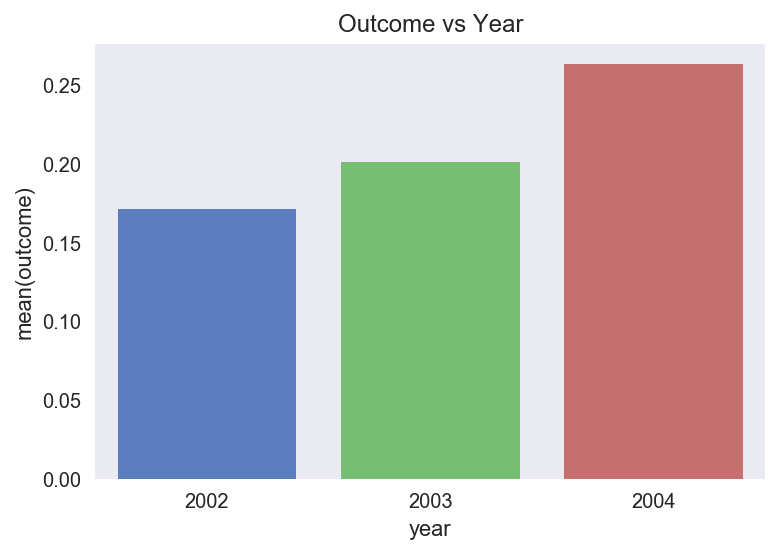

In [31]:
sns.barplot(x="year", 
            y="outcome", 
            data=part1, 
            palette='muted', 
            ci = None).set_title('Outcome vs Year');

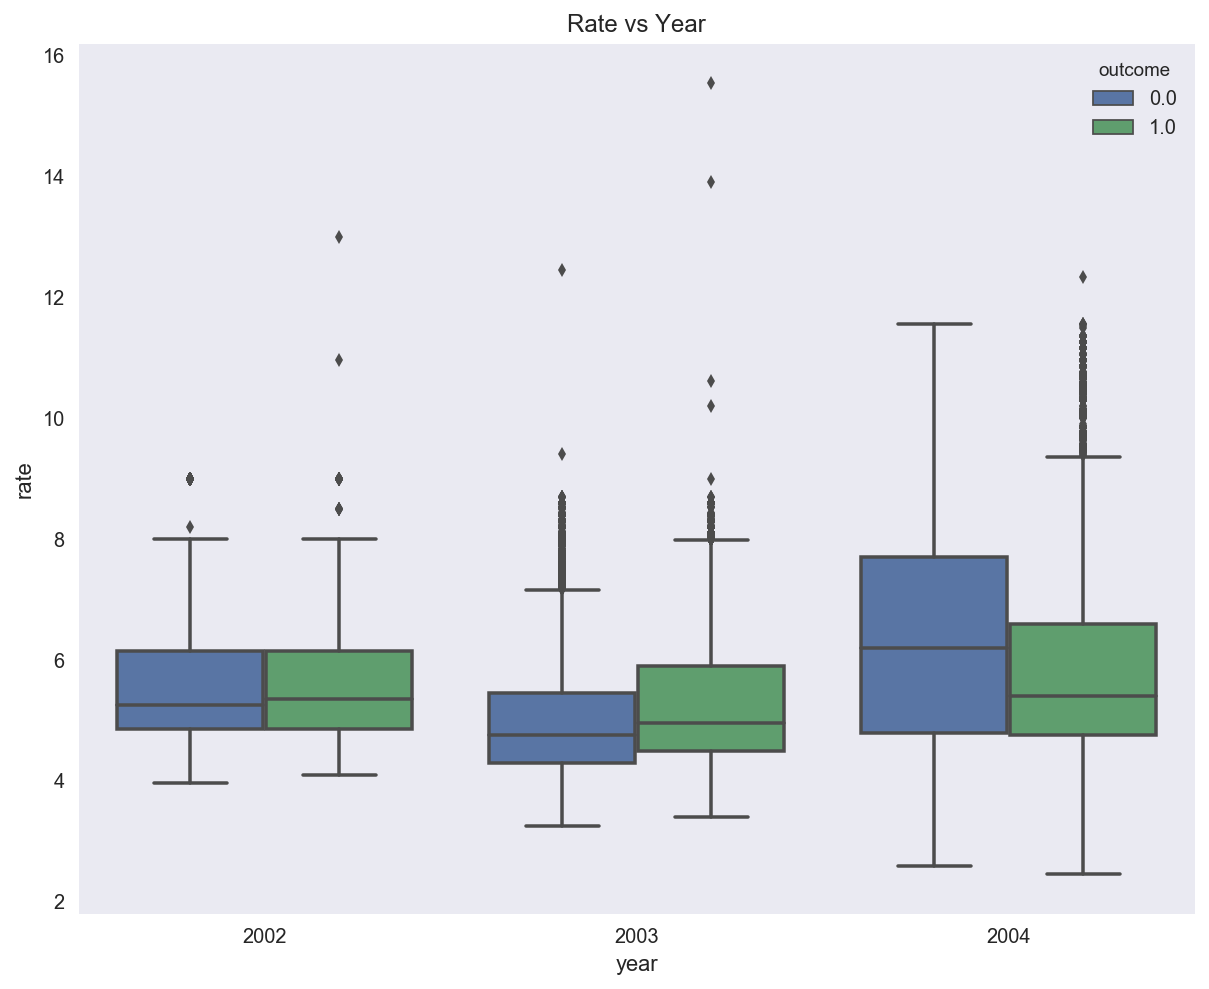

In [32]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x="year", y="rate", data=part1, hue="outcome").set_title('Rate vs Year');

## Term Analytics

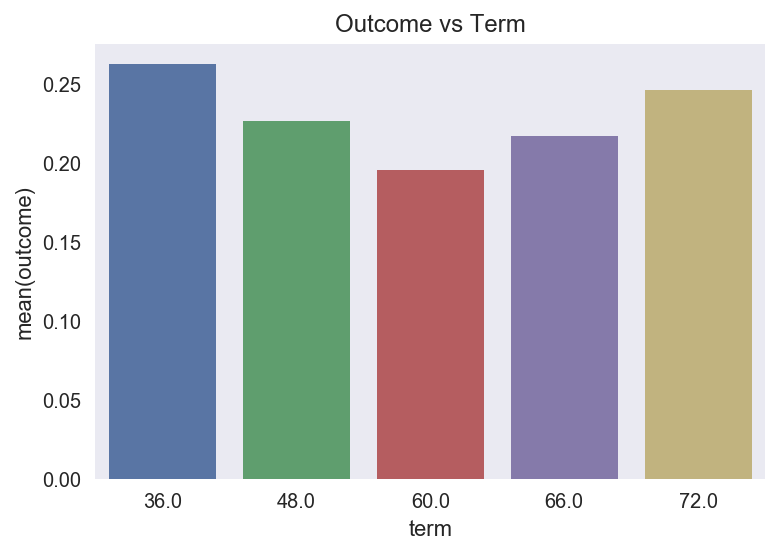

In [33]:
plt.subplots(figsize=(6, 4))
sns.barplot(x="term", 
            y="outcome", 
            data=part1, 
            ci = None).set_title('Outcome vs Term');

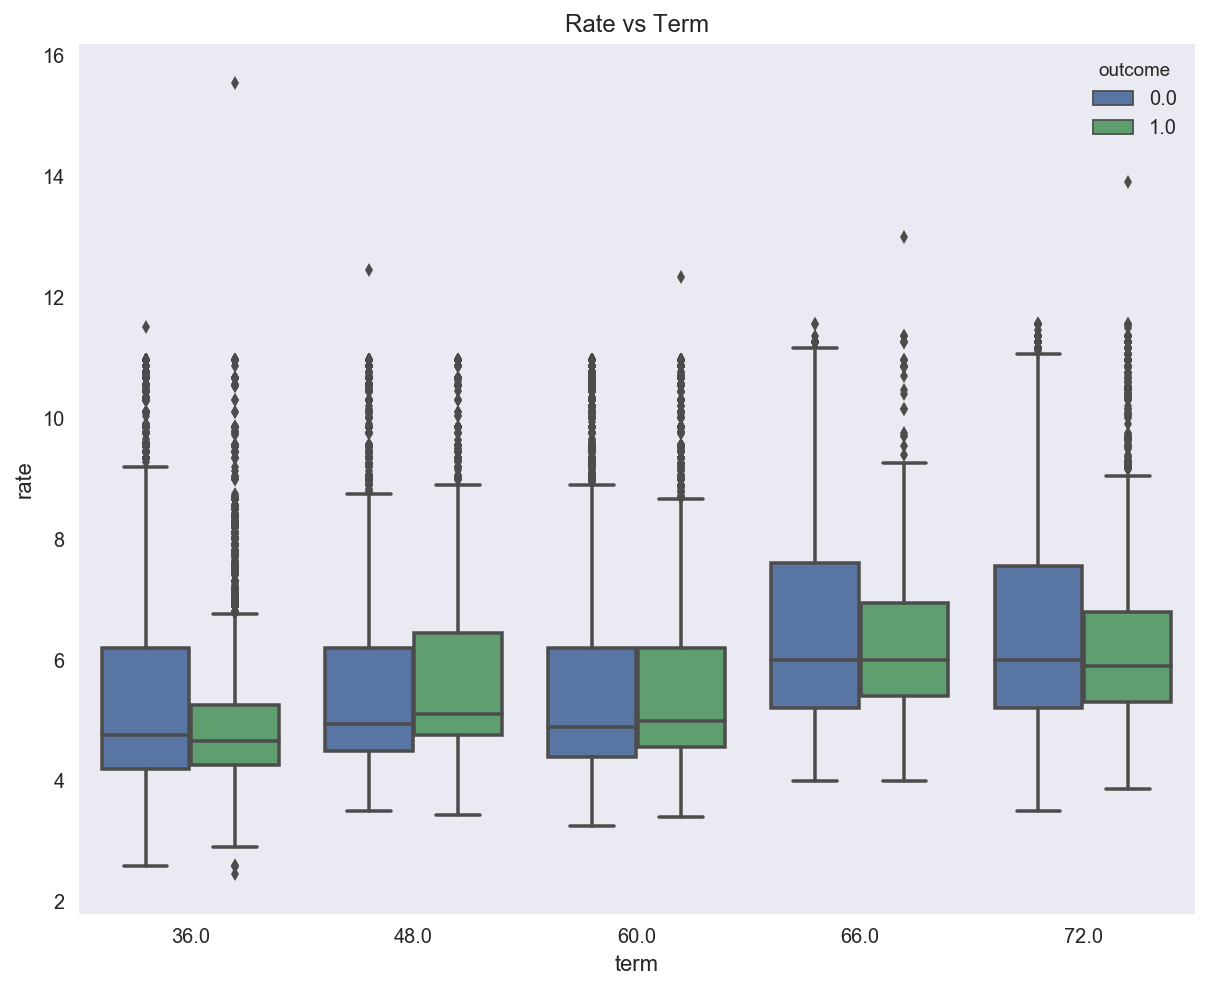

In [34]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x="term", y="rate", data=part1, hue="outcome").set_title('Rate vs Term');

## Amount Analytics

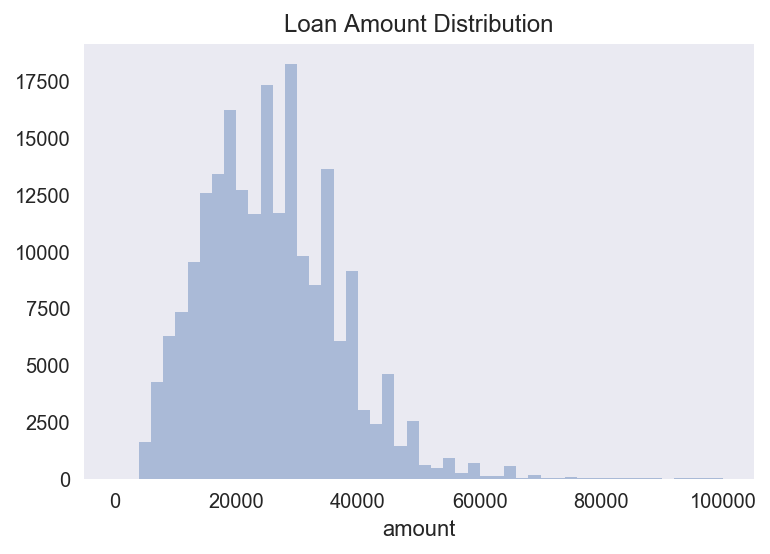

In [35]:
sns.distplot(part1.amount, kde=False).set_title('Loan Amount Distribution');

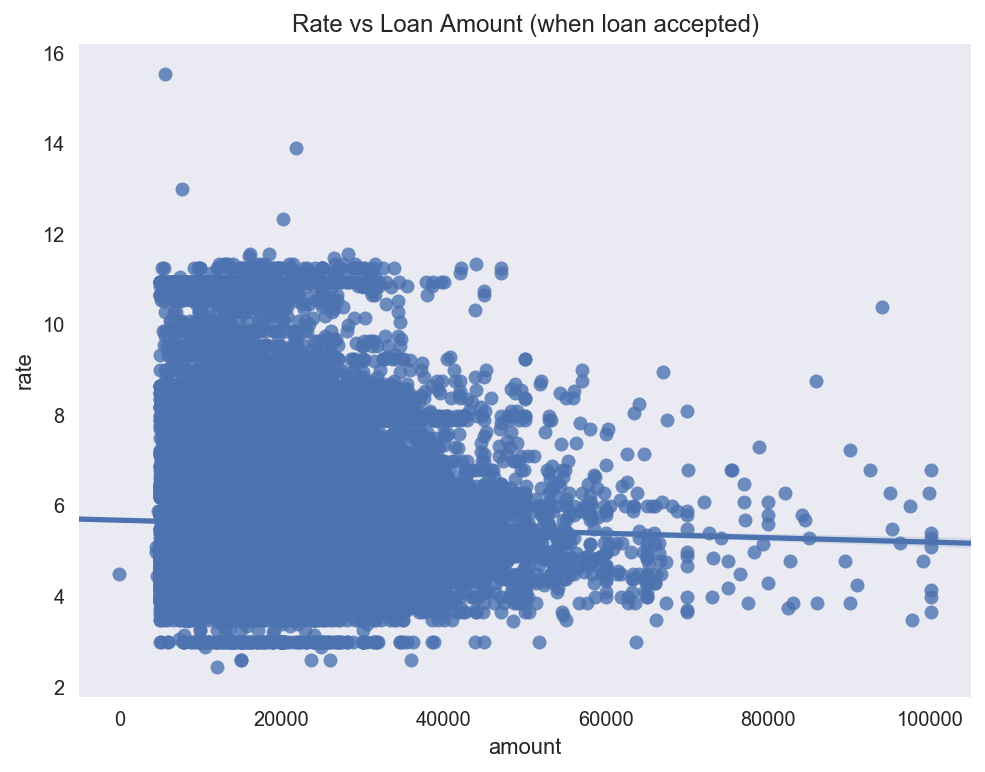

In [36]:
plt.subplots(figsize=(8, 6))
sns.regplot(x="amount", y="rate", data=part1[part1.outcome == 1]).set_title('Rate vs Loan Amount (when loan accepted)');

## Previous Rate Analytics

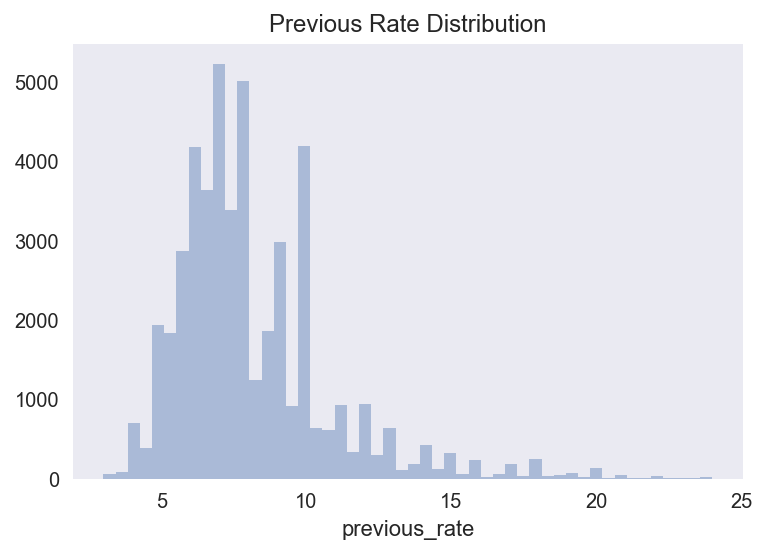

In [37]:
sns.distplot(part1[part1.previous_rate > 0].previous_rate, kde=False).set_title('Previous Rate Distribution');

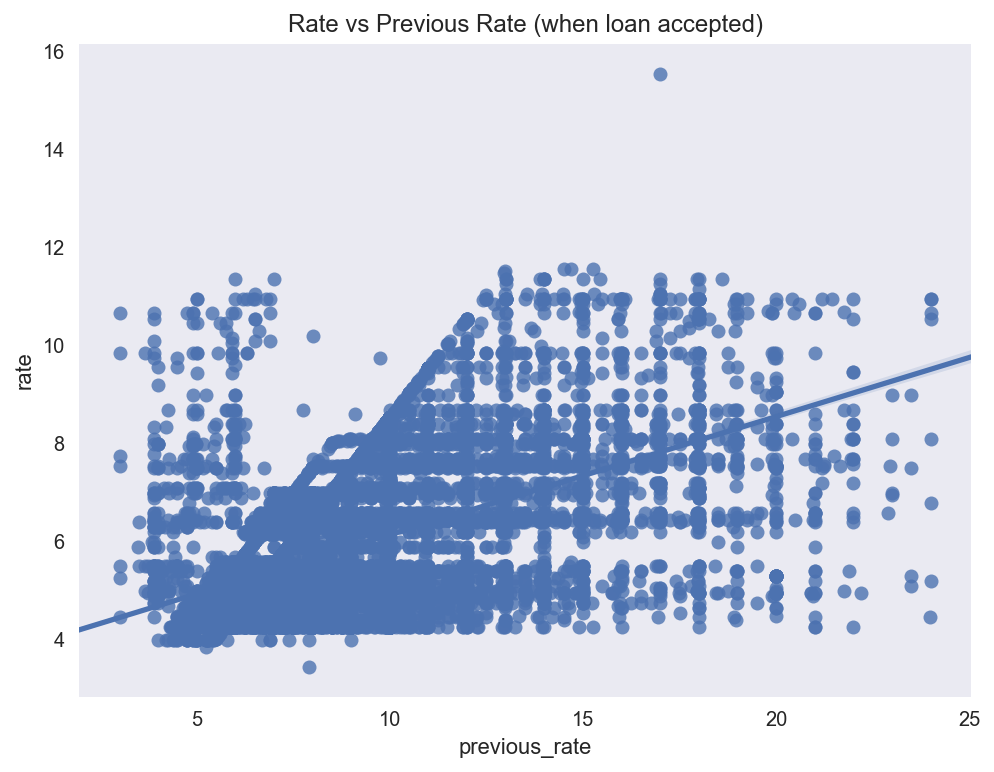

In [38]:
plt.subplots(figsize=(8, 6))
sns.regplot(x="previous_rate", y="rate", data=part1[(part1.outcome == 1) & (part1.previous_rate > 0)]).set_title('Rate vs Previous Rate (when loan accepted)');

## Automobile Case: Car Type Analytics

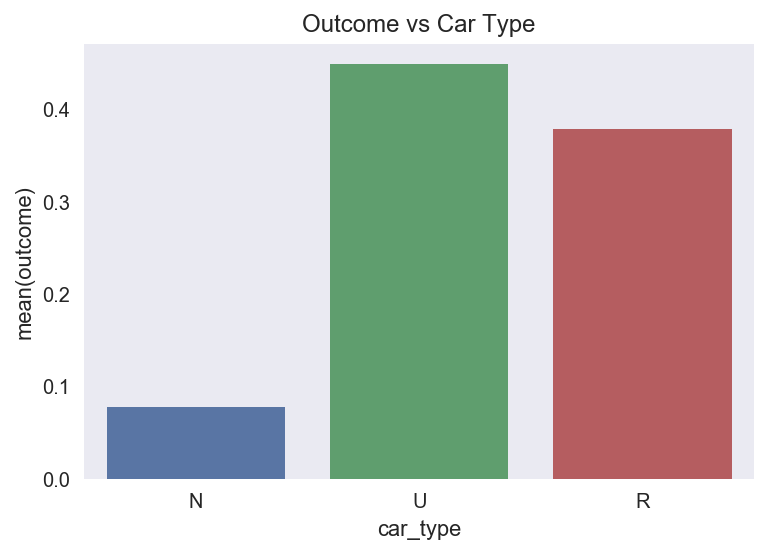

In [30]:
sns.barplot(x="car_type", 
            y="outcome", 
            data=part1, 
            ci = None).set_title('Outcome vs Car Type');

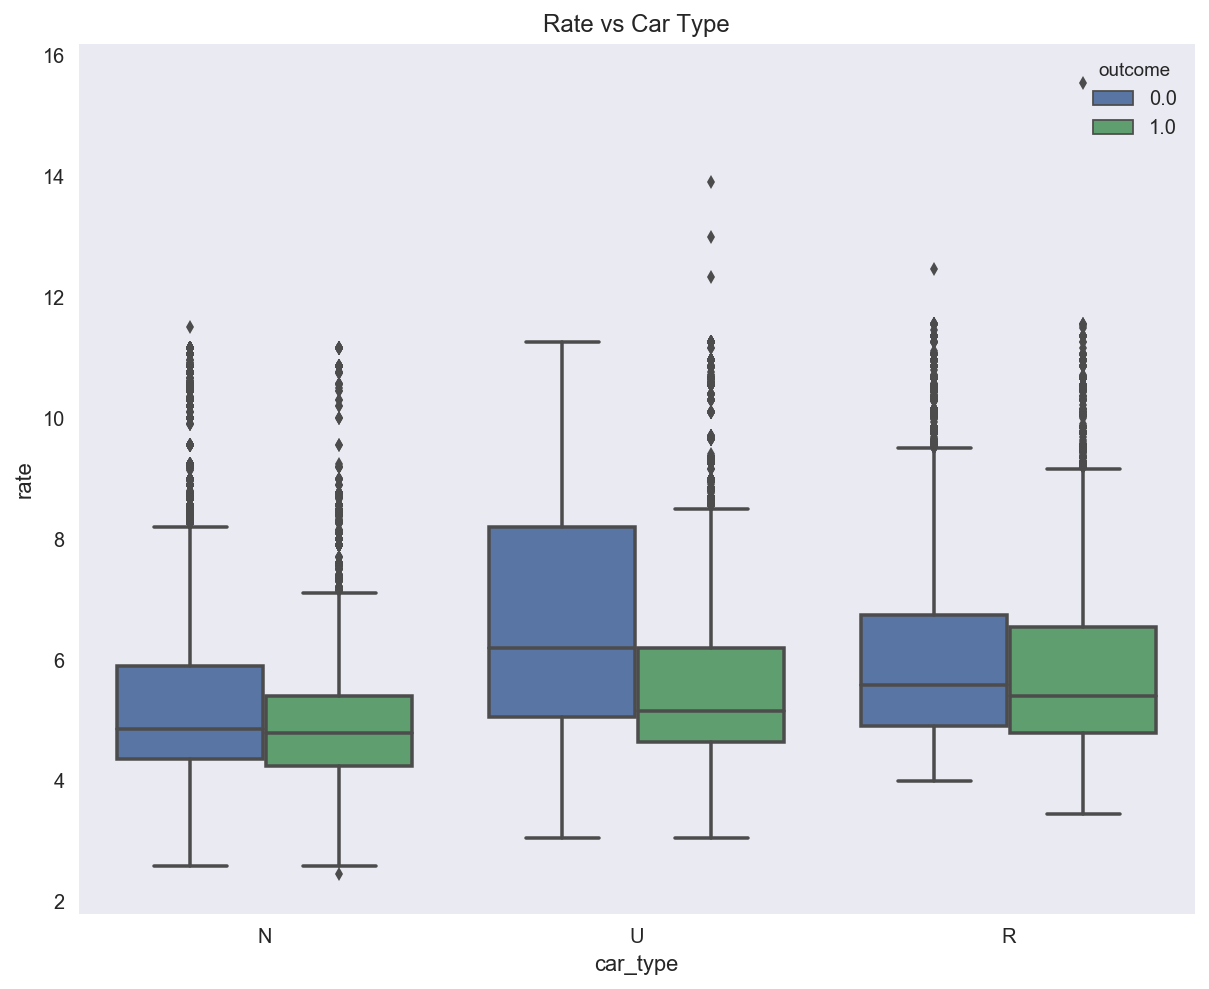

In [31]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x="car_type", y="rate", data=part1, hue="outcome").set_title('Rate vs Car Type');

## Competition Rate Analytics

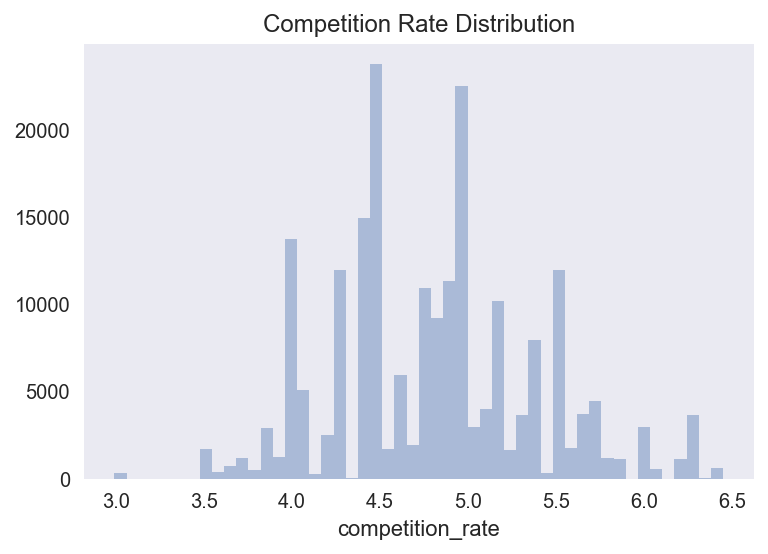

In [32]:
sns.distplot(part1.competition_rate, kde=False).set_title('Competition Rate Distribution');

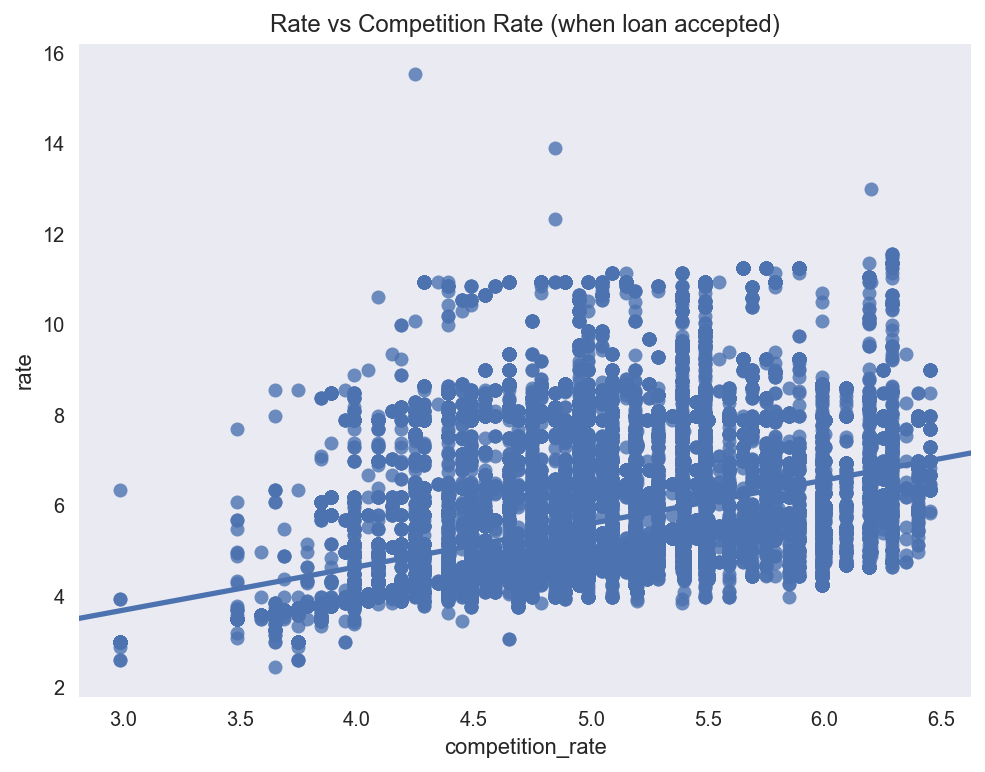

In [33]:
plt.subplots(figsize=(8, 6))
sns.regplot(x="competition_rate", y="rate", data=part1[part1.outcome == 1]).set_title('Rate vs Competition Rate (when loan accepted)');

## Rate Analytics

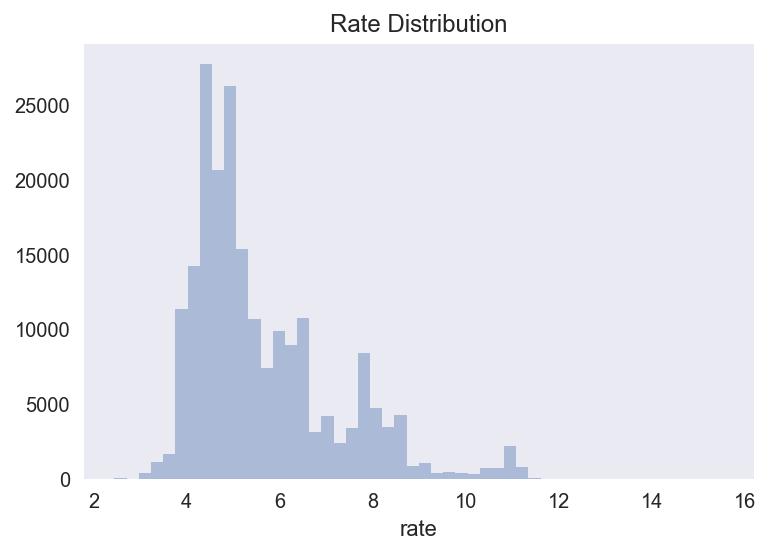

In [34]:
sns.distplot(part1.rate, kde=False).set_title('Rate Distribution');

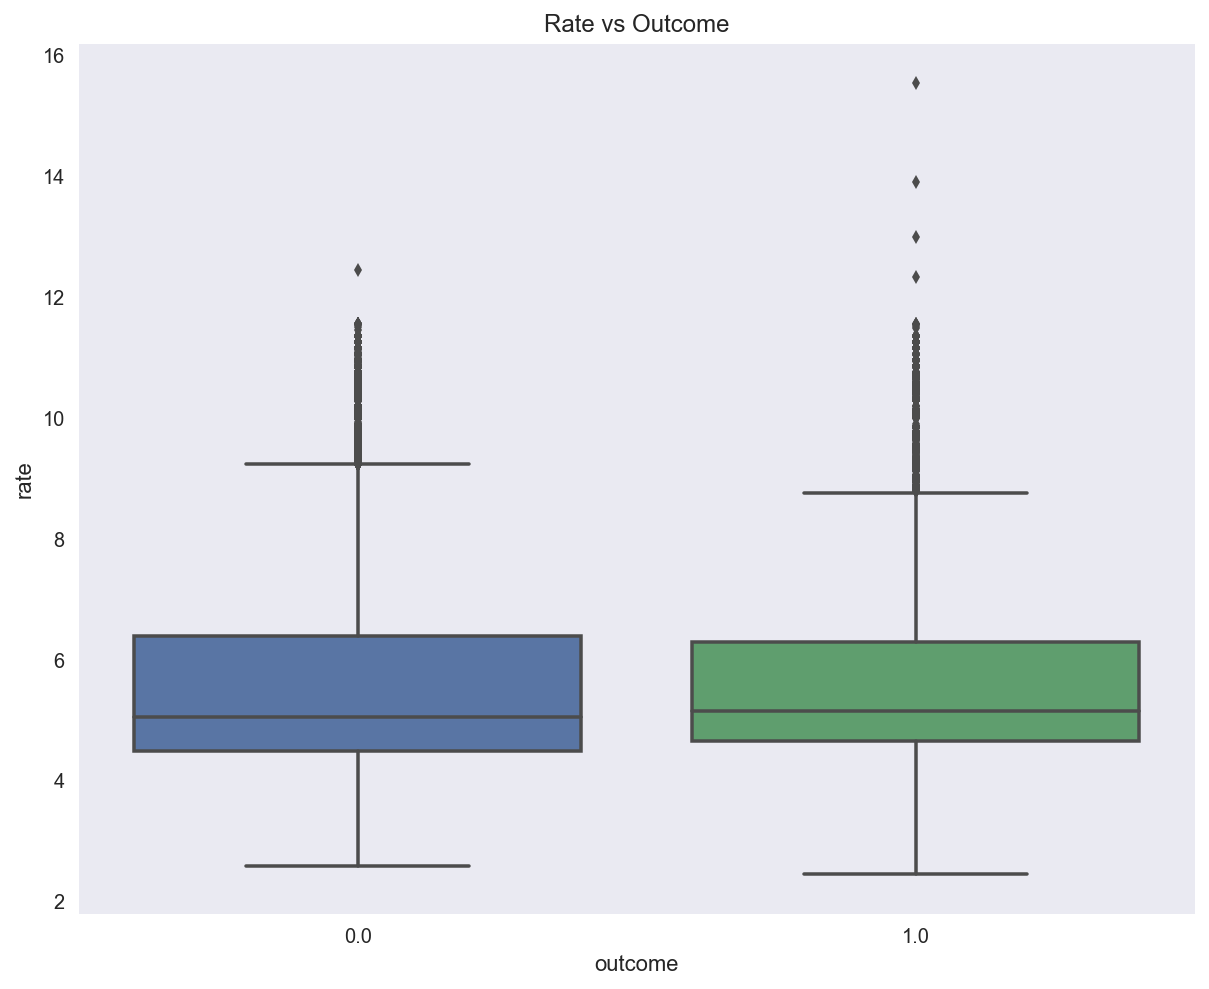

In [35]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x="outcome", y="rate", data=part1).set_title('Rate vs Outcome');

## Cost of Funds Analytics

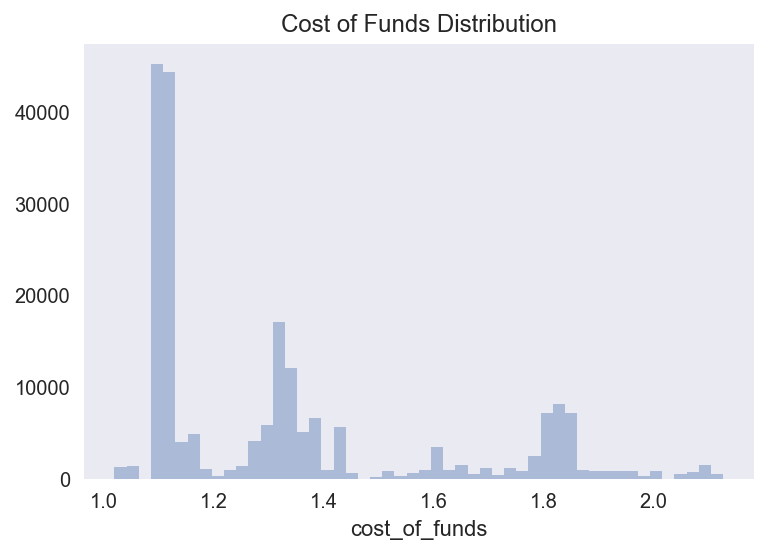

In [36]:
sns.distplot(part1.cost_of_funds, kde=False).set_title('Cost of Funds Distribution');

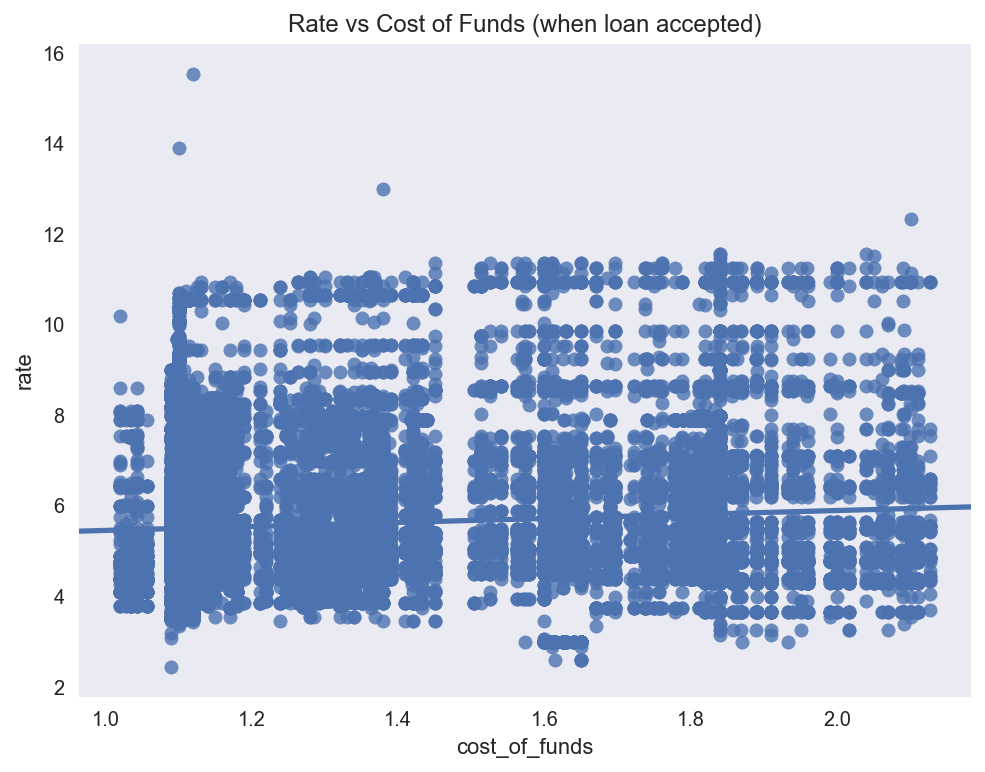

In [37]:
plt.subplots(figsize=(8, 6))
sns.regplot(x="cost_of_funds", y="rate", data=part1[part1.outcome == 1]).set_title('Rate vs Cost of Funds (when loan accepted)');

In [38]:
part1.head()

,tier,fico,approve_date,term,amount,previous_rate,car_type,competition_rate,outcome,rate,cost_of_funds,partner_bin,day,month,year
0,3.0,695.0,2002-07-01,72.0,35000.0,0.0,N,6.25,0.0,7.49,1.8388,1.0,0,7,2002
1,1.0,751.0,2002-07-01,60.0,40000.0,0.0,N,5.65,0.0,5.49,1.8388,3.0,0,7,2002
2,1.0,731.0,2002-07-01,60.0,18064.0,0.0,N,5.65,0.0,5.49,1.8388,3.0,0,7,2002
3,4.0,652.0,2002-07-01,72.0,15415.0,0.0,N,6.25,0.0,8.99,1.8388,3.0,0,7,2002
4,1.0,730.0,2002-07-01,48.0,32000.0,0.0,N,5.65,0.0,5.49,1.8388,1.0,0,7,2002


## Partner Bin Analytics

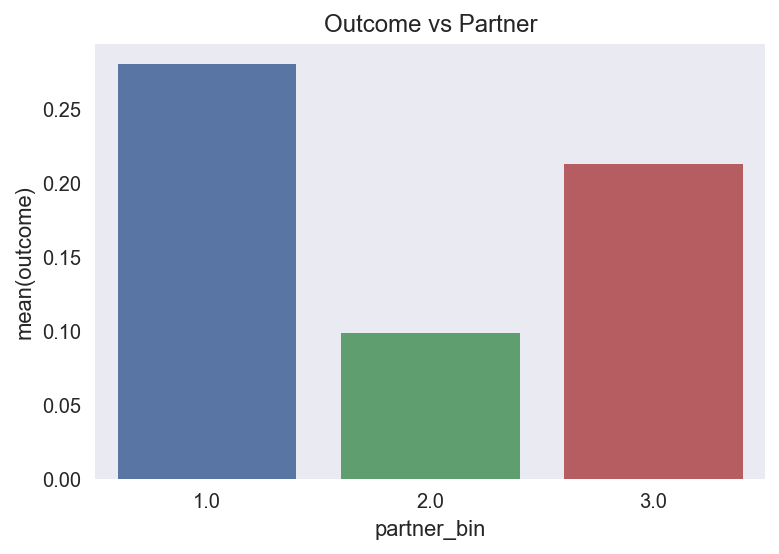

In [39]:
sns.barplot(x="partner_bin", 
            y="outcome", 
            data=part1, 
            ci = None).set_title('Outcome vs Partner');

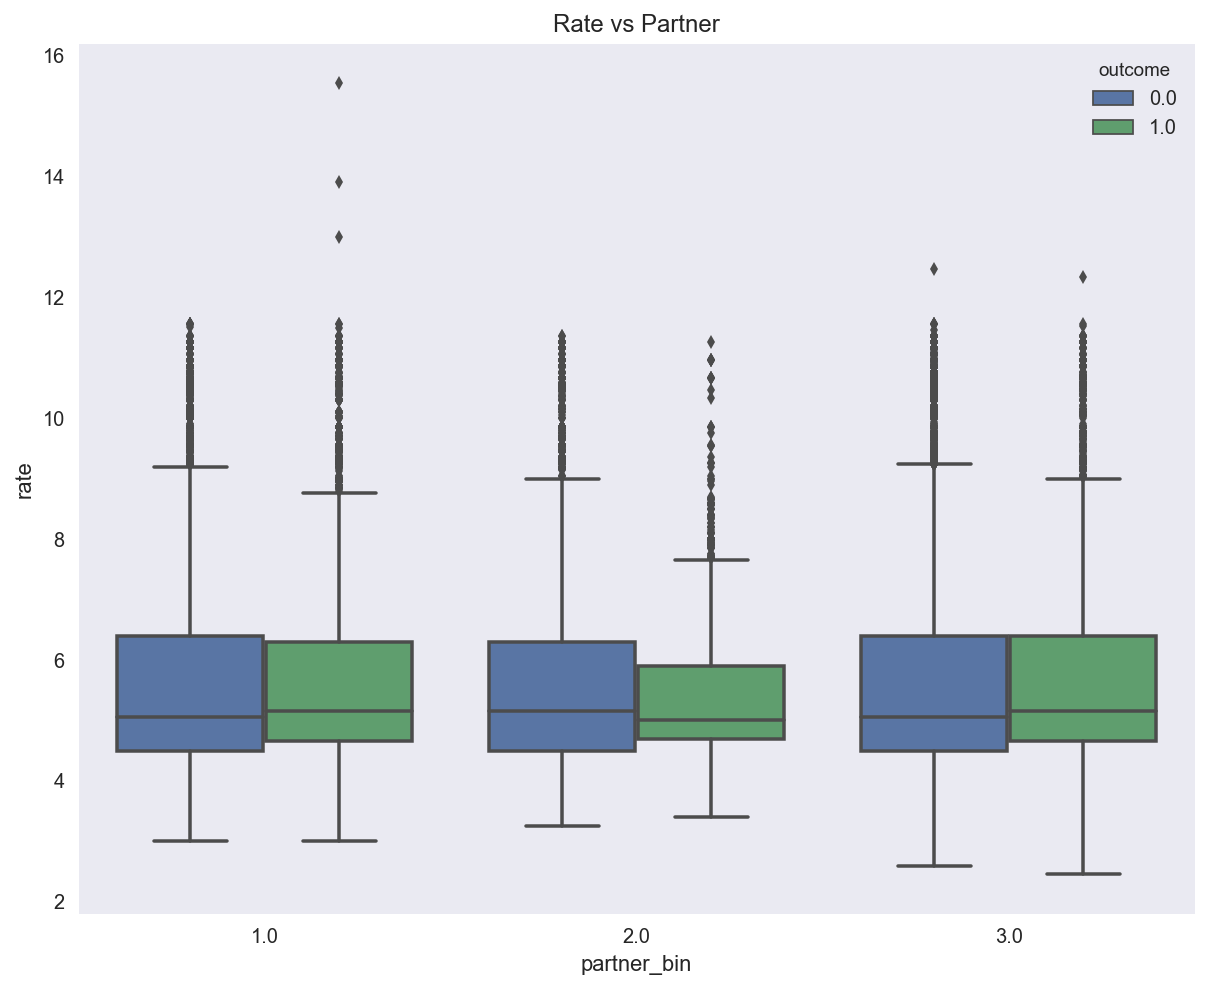

In [40]:
plt.subplots(figsize=(10, 8))
sns.boxplot(x="partner_bin", y="rate", data=part1, hue="outcome").set_title('Rate vs Partner');